In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import sys 
sys.path.append("../")

In [9]:
from RNN_utils import window_transform_text, encode_io_pairs, get_deep_rnn
from fnn_helper import PlotLosses

Using TensorFlow backend.


# Abro archivo de texto con obra e imporimo los primeros 1000 caracteres

In [14]:
text = open('bodas_de_sangre.txt').read()
number_of_chars = len(text)
all_chars = sorted(set(text))
print('Cantidad de caracteres: ' + str(number_of_chars))
print('Cantidad de caracteres unicos: ' + str(len(all_chars)))
print(all_chars)
print('------------------------------------------------------')
print(text[:1000])

Cantidad de caracteres: 67561
Cantidad de caracteres unicos: 71
['\n', ' ', '!', '(', ')', ',', '.', '1', '2', '3', '9', ':', ';', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'z', '¡', '¿', 'É', 'Ñ', 'á', 'é', 'í', 'ñ', 'ó', 'ú']
------------------------------------------------------
BODAS DE SANGRE(1933)

Poema trágico en tres actos y siete cuadros

Personajes
 
Madre
Criada
Leonardo
Mozos
Novia
Vecina
Novio
Leñadores
Suegra
Muchachas
Padre de la novia
Mozos
Mujer de Leonardo
Luna
Muerte (como mendiga)

Acto primero

CUADRO PRIMERO

Habitación pintada de amarillo.

NOVIO: (Entrando) Madre.

MADRE: ¿Que?

NOVIO:Me voy.

MADRE: ¿Adónde?

NOVIO:A la viña. (Va a salir)

MADRE: Espera.

NOVIO:¿Quieres algo?

MADRE: Hijo, el almuerzo.

NOVIO: Déjalo. Comeré uvas. Dame la navaja.

MADRE: ¿Para qué?

NOVI

# Separo en Validación y Train

In [16]:
validation_index = int(number_of_chars*0.6)
text_train = text[:validation_index]
text_validation = text[validation_index:]
print(len(text_train))
print(len(text_validation))

40536
27025


In [17]:
chars_train = set(text_train)
chars_test = set(text_validation)
chars_set = chars_train.intersection(chars_test)
chars = sorted(list(chars_set))

print ("Cantidad de catacteres comunes " +  str(len(chars)))

Cantidad de catacteres comunes 69


# Analisis de la frecuencia de los caracteres

In [19]:
from collections import Counter
Counter(text_train).most_common()

[(' ', 6224),
 ('a', 3512),
 ('e', 3295),
 ('o', 2489),
 ('s', 1828),
 ('n', 1727),
 ('r', 1662),
 ('l', 1466),
 ('\n', 1463),
 ('i', 1196),
 ('u', 1145),
 ('d', 1101),
 ('t', 970),
 ('.', 856),
 ('c', 810),
 ('m', 735),
 ('A', 678),
 (':', 584),
 ('p', 488),
 ('E', 469),
 ('R', 390),
 ('v', 385),
 ('O', 376),
 ('b', 372),
 ('D', 366),
 ('q', 341),
 ('N', 330),
 ('g', 304),
 ('y', 300),
 ('h', 295),
 ('M', 271),
 (',', 268),
 ('I', 256),
 ('C', 235),
 ('V', 227),
 ('(', 206),
 (')', 206),
 ('j', 194),
 ('L', 184),
 ('í', 165),
 ('S', 153),
 ('é', 150),
 ('!', 150),
 ('P', 149),
 ('¡', 147),
 ('?', 144),
 ('¿', 143),
 ('á', 133),
 ('U', 131),
 ('ñ', 100),
 ('f', 94),
 ('z', 88),
 ('ó', 78),
 ('H', 75),
 ('Q', 73),
 ('T', 71),
 ('Y', 70),
 ('J', 55),
 ('G', 37),
 ('ú', 34),
 ('B', 17),
 ('1', 15),
 ('F', 15),
 (';', 13),
 ('x', 8),
 ('Z', 8),
 ('2', 7),
 ('3', 6),
 ('É', 2),
 ('9', 1)]

# Veo ejemplos en train de como queda Entrada / Salida

In [20]:
# Cambiar step size para ver que ocurre
window_size = 100
step_size = 1
inputs, outputs = window_transform_text(text_train,window_size,step_size)

print('input = ' + inputs[0])
print('output = ' + outputs[0])
print()
print('------------------------------------------------------------------------')
print()
print('input = ' + inputs[1])
print('output = ' + outputs[1])

input = BODAS DE SANGRE(1933)

Poema trágico en tres actos y siete cuadros

Personajes
 
Madre
Criada
Leonar
output = d

------------------------------------------------------------------------

input = ODAS DE SANGRE(1933)

Poema trágico en tres actos y siete cuadros

Personajes
 
Madre
Criada
Leonard
output = o


In [21]:
chars_to_indices = dict((c, i) for i, c in enumerate(chars))
indices_to_chars = dict((i, c) for i, c in enumerate(chars))
print(chars_to_indices)

{'\n': 0, ' ': 1, '!': 2, '(': 3, ')': 4, ',': 5, '.': 6, '1': 7, '2': 8, '3': 9, ':': 10, ';': 11, '?': 12, 'A': 13, 'B': 14, 'C': 15, 'D': 16, 'E': 17, 'F': 18, 'G': 19, 'H': 20, 'I': 21, 'J': 22, 'L': 23, 'M': 24, 'N': 25, 'O': 26, 'P': 27, 'Q': 28, 'R': 29, 'S': 30, 'T': 31, 'U': 32, 'V': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'l': 46, 'm': 47, 'n': 48, 'o': 49, 'p': 50, 'q': 51, 'r': 52, 's': 53, 't': 54, 'u': 55, 'v': 56, 'x': 57, 'y': 58, 'z': 59, '¡': 60, '¿': 61, 'É': 62, 'á': 63, 'é': 64, 'í': 65, 'ñ': 66, 'ó': 67, 'ú': 68}


# Codifico entradas y salidas para Train y Validation

In [29]:
window_size = 100
step_size = 1
X_train, y_train = encode_io_pairs(text_train, chars, window_size,step_size)
X_validation, y_validation = encode_io_pairs(text_validation, chars, window_size,step_size)

In [30]:
print(X_train.shape, y_train.shape)
print(X_validation.shape, y_validation.shape)

(40436, 100, 69) (40436, 69)
(26925, 100, 69) (26925, 69)


In [31]:
X_train[0,0]*1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

# Defino modelo

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
from keras.callbacks import ModelCheckpoint 
import keras
import random

In [35]:
model=get_deep_rnn(X_train.shape[1:], dense_units=len(chars), dropout_p=0.)

input shape =  (100, 69)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 200)          216000    
_________________________________________________________________
lstm_2 (LSTM)                (None, 200)               320800    
_________________________________________________________________
dense_4 (Dense)              (None, 69)                13869     
Total params: 550,669
Trainable params: 550,669
Non-trainable params: 0
_________________________________________________________________


# Primer modelo lo mas sencillo (sin dropout)

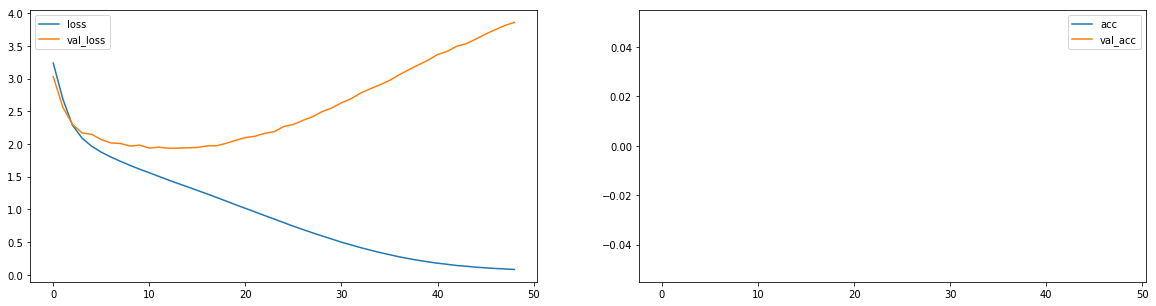

Epoch 50/100
 1500/40436 [>.............................] - ETA: 22s - loss: 0.0579

KeyboardInterrupt: 

In [36]:
batch_size = 250
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None)
checkpointer = ModelCheckpoint(filepath='bodes_sangre_LSTM_deep_no_dropout.hdf5', verbose=1, save_best_only=True)
model.fit(X_train, y_train, batch_size=batch_size, epochs=100, verbose = 1, 
                    validation_data = (X_validation, y_validation),
                    callbacks=[checkpointer, plot_losses])

In [37]:
model.save_weights('bodes_sangre_LSTM_deep_no_dropout_overfitted.hdf5')

# Modelo con dropout 0.5

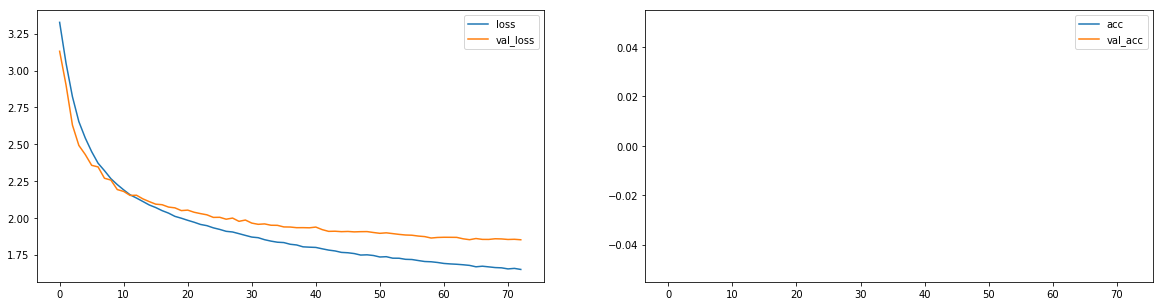

Epoch 74/100
19000/40436 [=============>................] - ETA: 13s - loss: 1.6434

KeyboardInterrupt: 

In [40]:
model_2=get_deep_rnn(X_train.shape[1:], dense_units=len(chars), dropout_p=0.5)
batch_size = 250
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None)
checkpointer = ModelCheckpoint(filepath='bodes_sangre_LSTM_deep_dropout_0.5.hdf5', verbose=1, save_best_only=True)
hist_2=model_2.fit(X_train, y_train, batch_size=batch_size, epochs=100, verbose = 1, 
                    validation_data = (X_validation, y_validation),
                    callbacks=[checkpointer, plot_losses])

# Modelo droput 0.5 solo entreno por 2 epochs

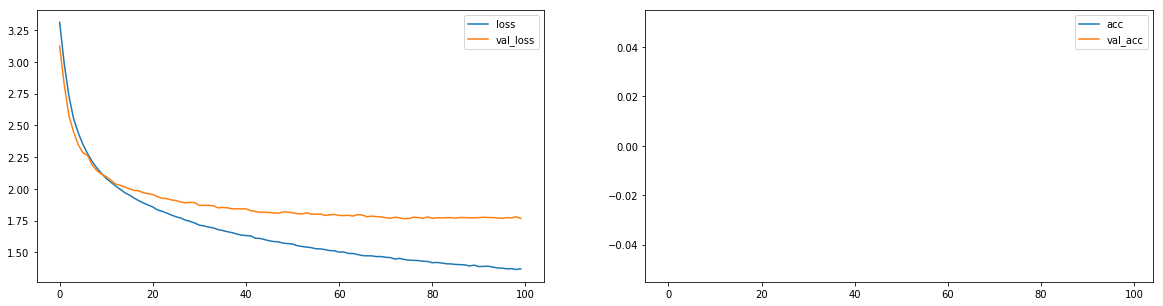

40436/40436 [==============================] - 136s - loss: 1.3705 - val_loss: 1.7678


In [56]:
model_3=get_deep_rnn(X_train.shape[1:], dense_units=len(chars), dropout_p=0.5)
batch_size = 250
plot_losses = PlotLosses(plot_interval=1, evaluate_interval=None)
checkpointer = ModelCheckpoint(filepath='bodes_sangre_LSTM_deep_dropout_2_epochs.hdf5', verbose=1, save_best_only=True)
model_3.fit(X_train, y_train, batch_size=batch_size, epochs=100, verbose = 1, 
                    validation_data = (X_validation, y_validation),
                    callbacks=[checkpointer, plot_losses])